In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2022/train.csv
/kaggle/input/tabular-playground-series-feb-2022/test.csv


In [2]:
data = pd.read_csv('../input/tabular-playground-series-feb-2022/train.csv')
data.drop('row_id',axis=1,inplace = True)
data.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [3]:
data_test = pd.read_csv('../input/tabular-playground-series-feb-2022/test.csv')
data_test.drop('row_id',axis=1,inplace = True)
data_test.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 437.9+ MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 286 entries, A0T0G0C10 to A10T0G0C0
dtypes: float64(286)
memory usage: 218.2 MB


### Random Graph Visualization of deviated FBC spectrum 

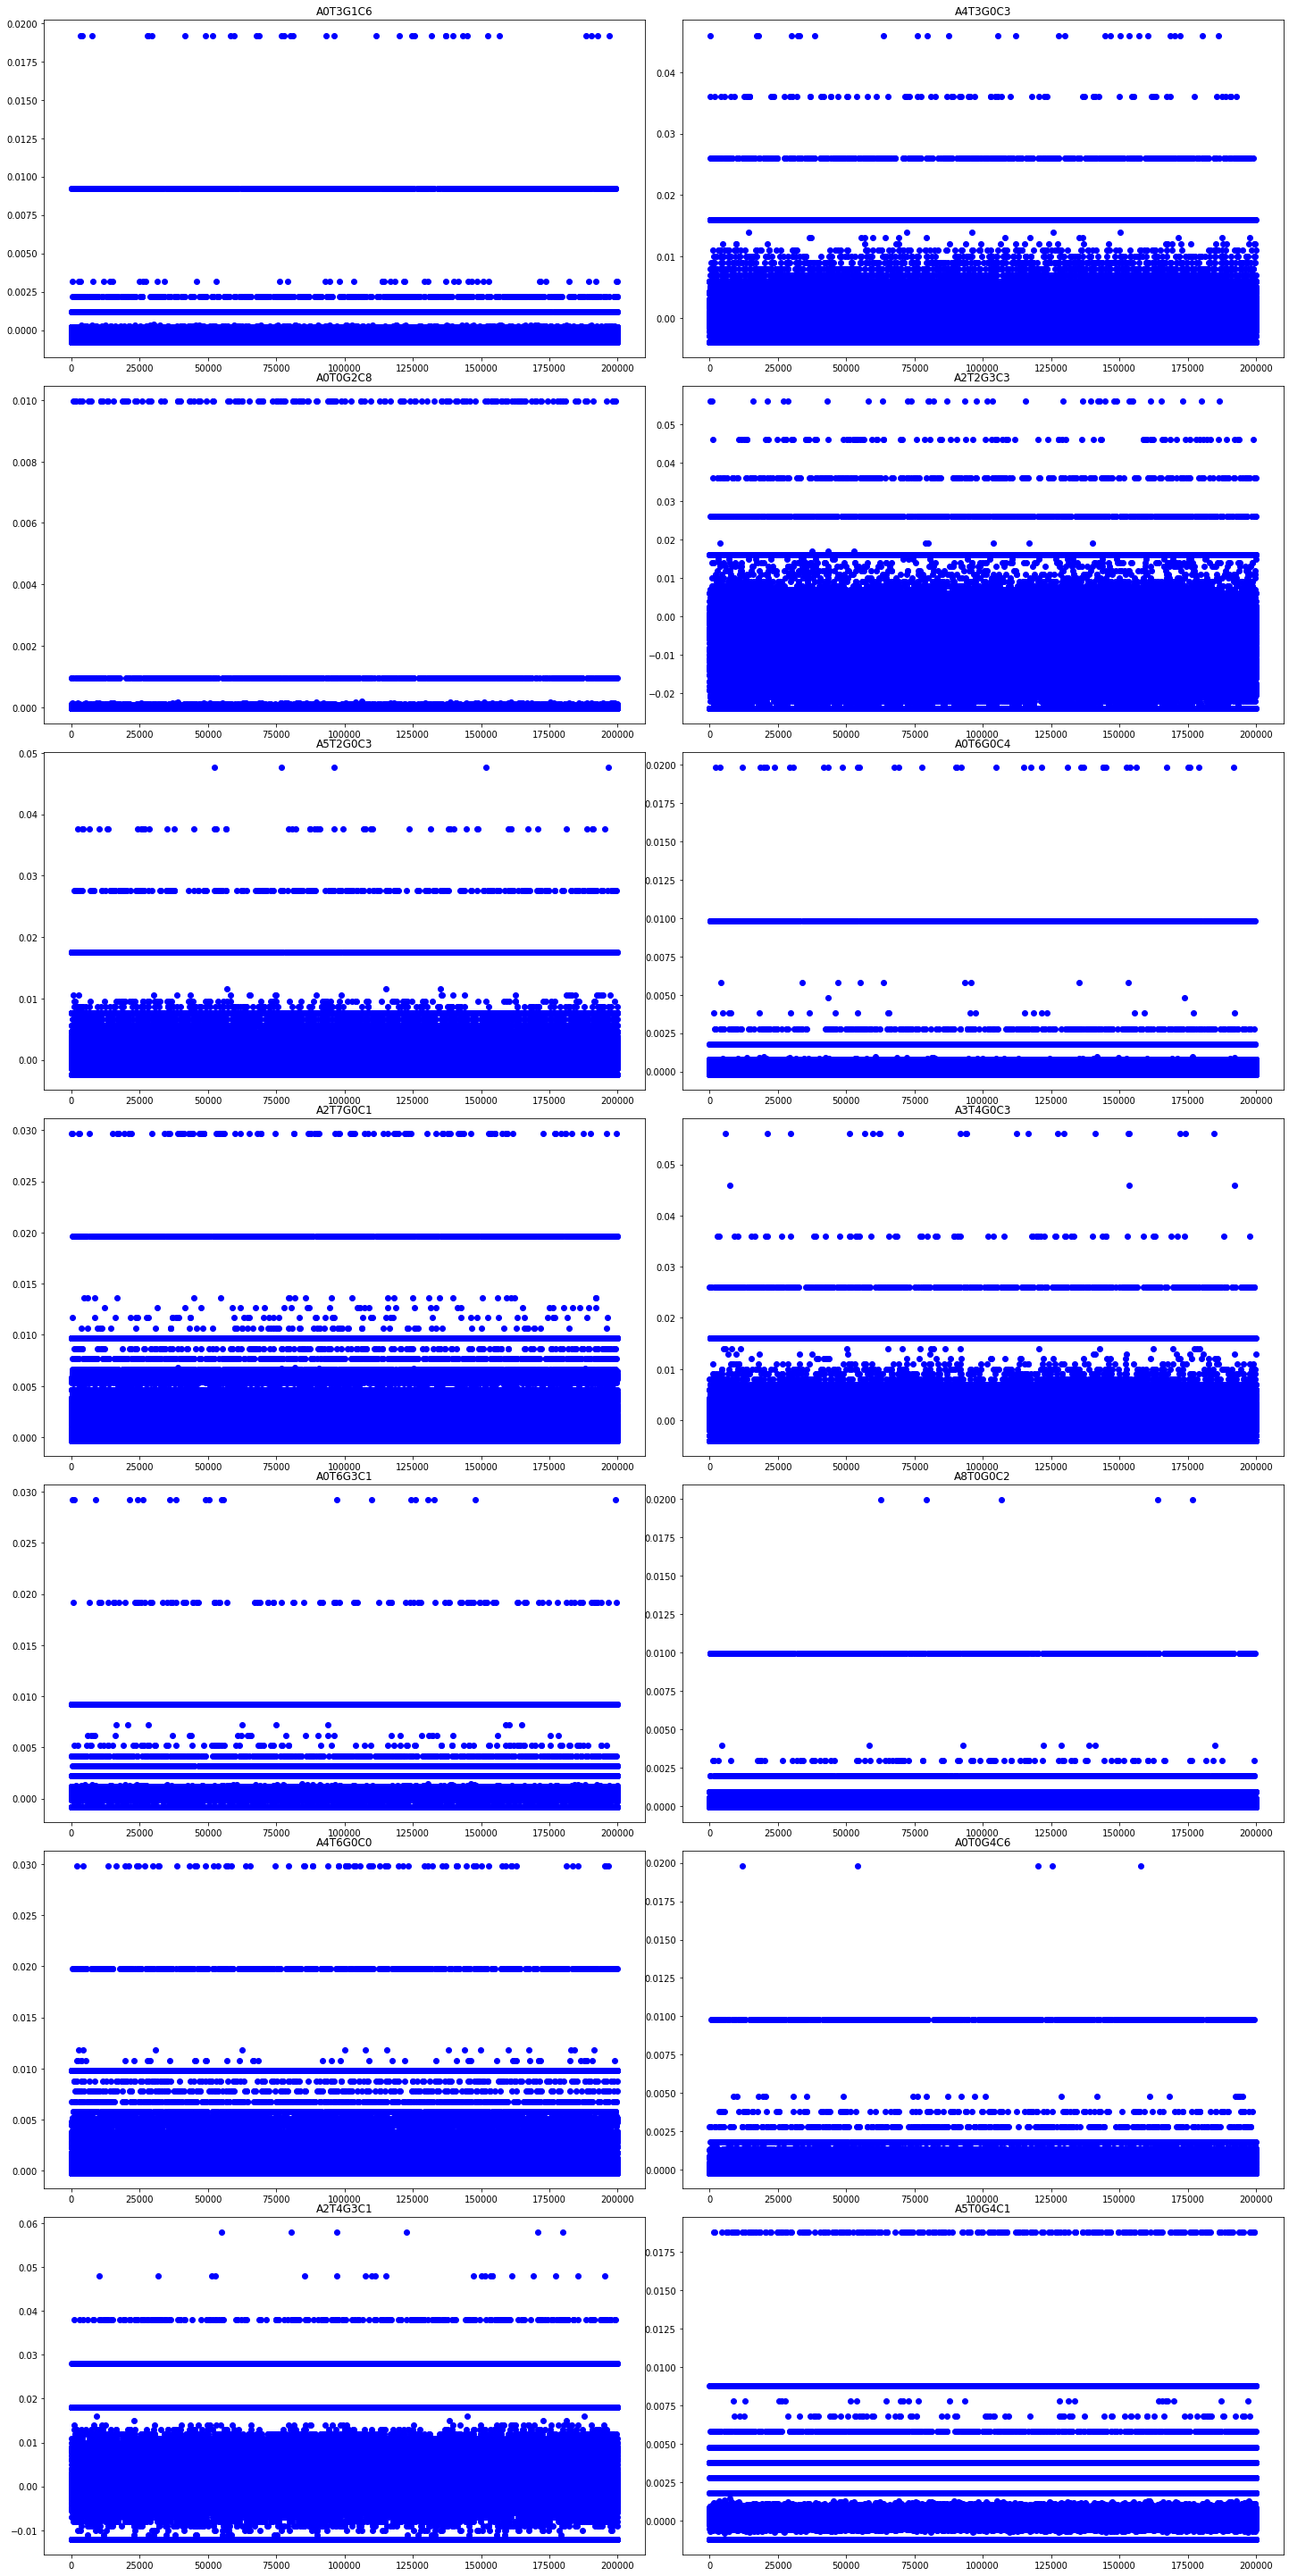

In [7]:
fig, ax = plt.subplots(7,2,figsize=(20,40))
fig.tight_layout()
for ind in range(14):
        rand_ind = random.randint(0,286)
        val = data.iloc[:,rand_ind]
        i, j = ind//2, ind%2
        ax[i,j].plot(val, 'bo')
        ax[i,j].set_title(data.columns[rand_ind])
plt.show()

Note: **Duplicated data** is visible in the above figures

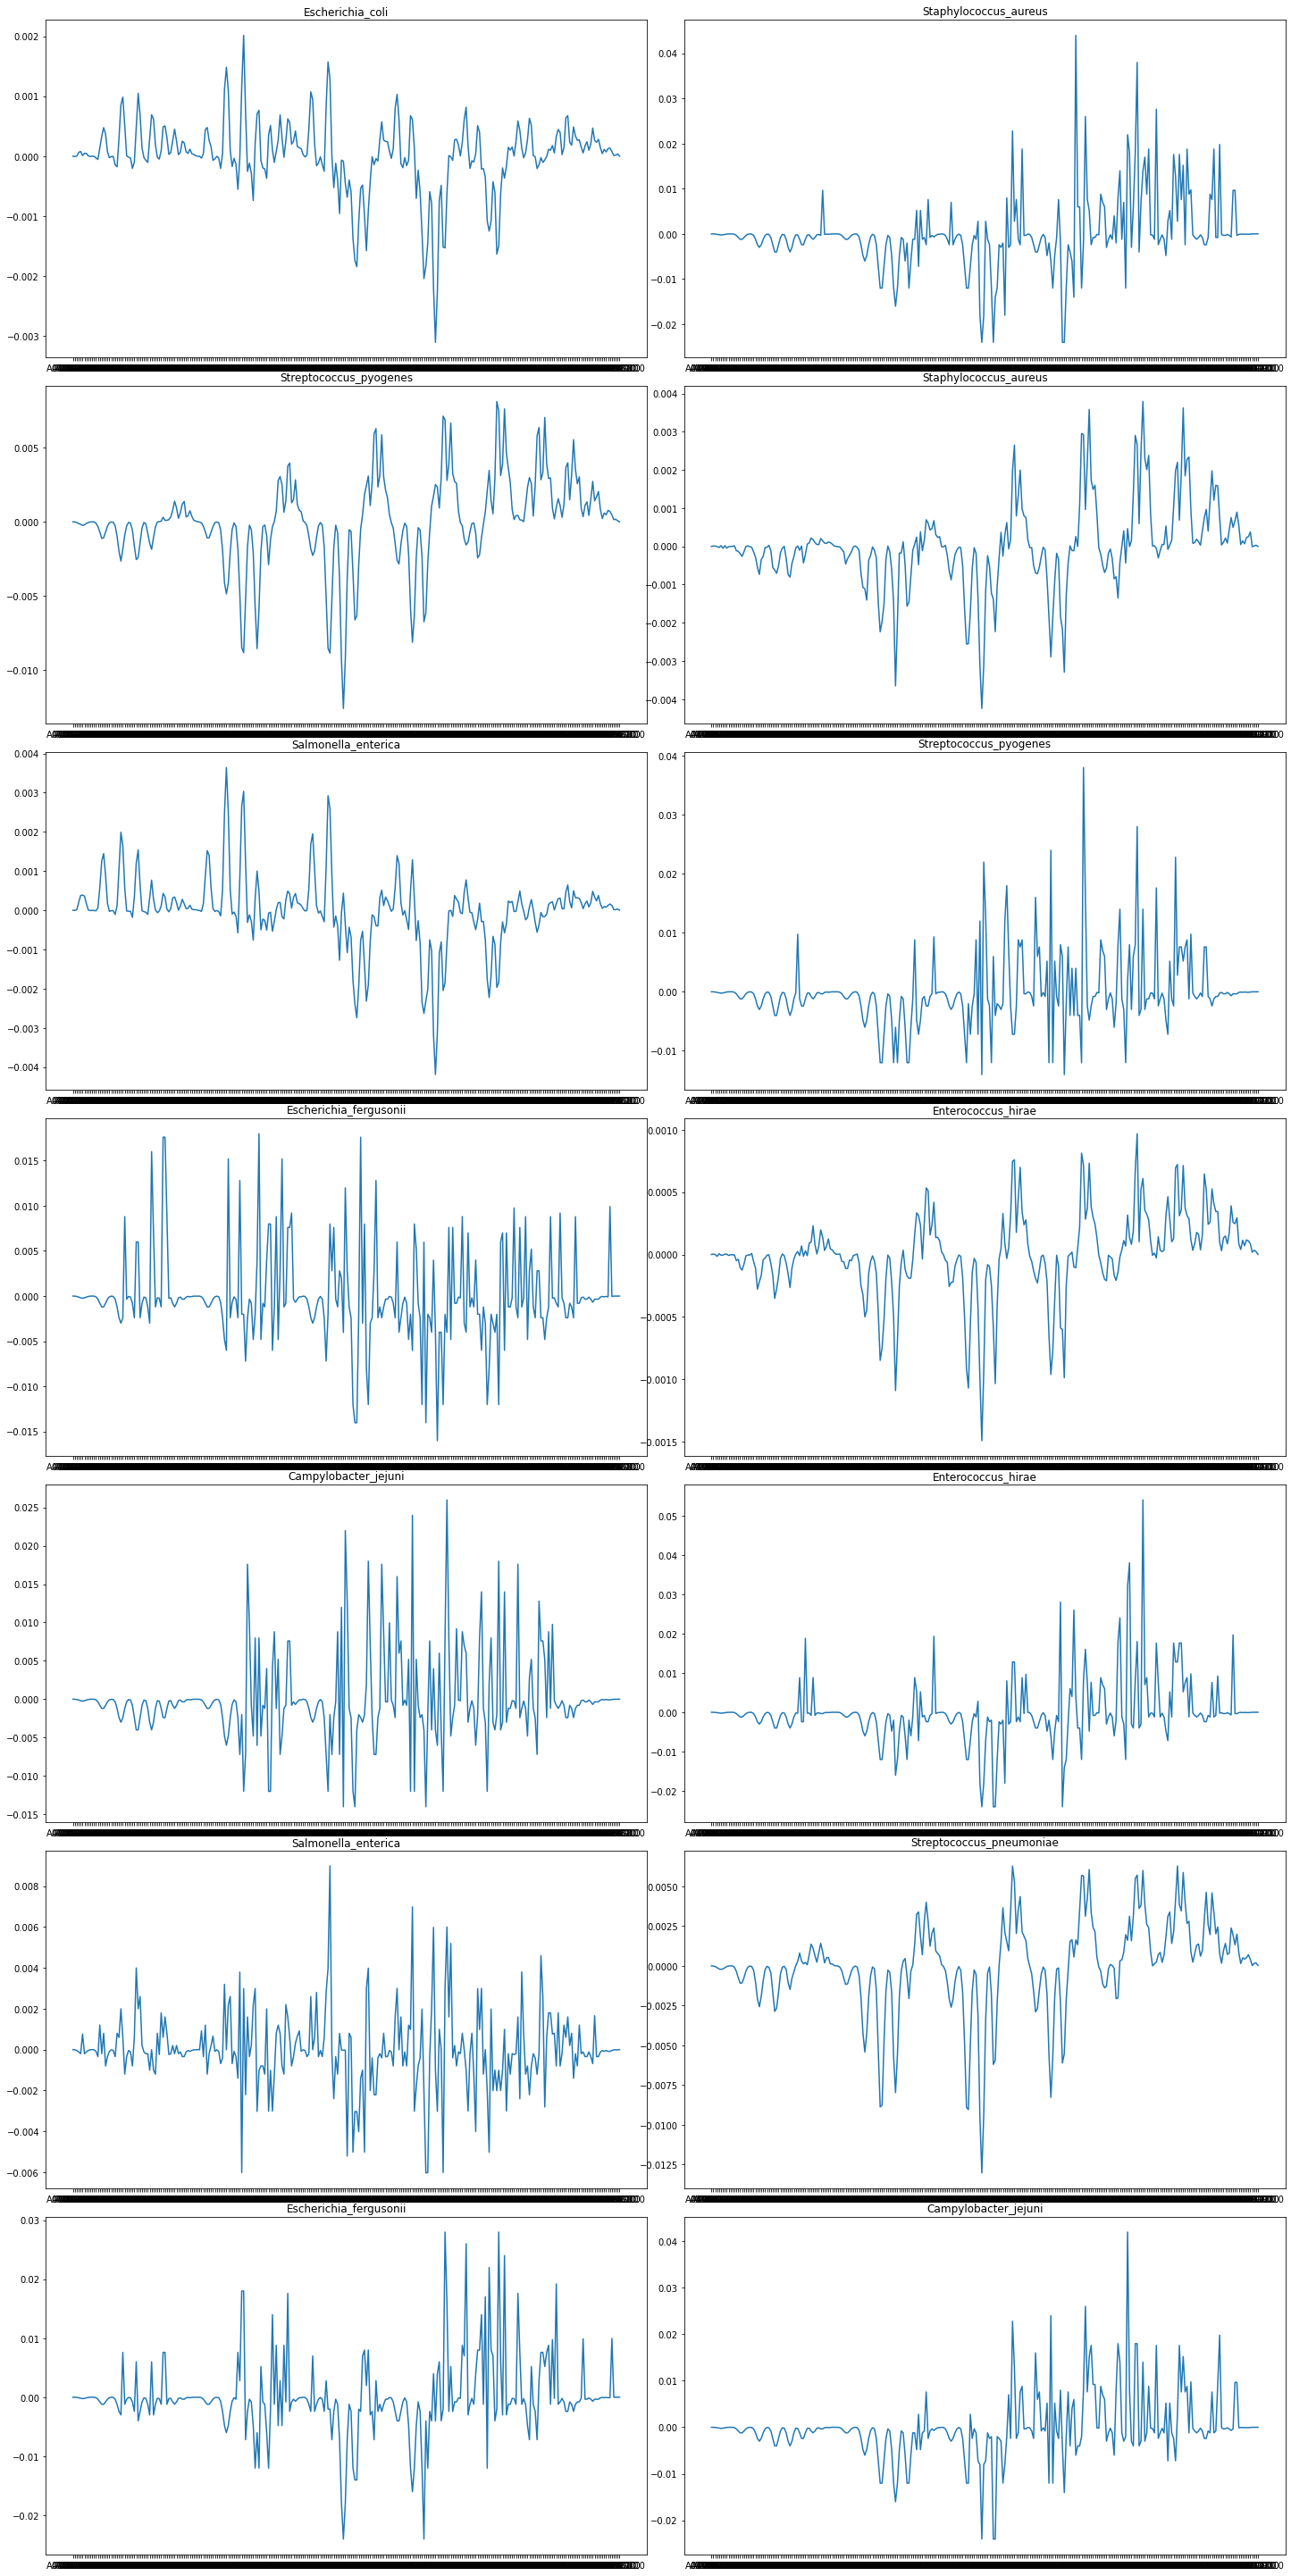

In [8]:
fig, ax = plt.subplots(7,2,figsize=(20,40))
fig.tight_layout()
for ind in range(14):
        rand_ind = random.randint(0,200000)
        val = data.loc[rand_ind][:286]
        i, j = ind//2, ind%2
        ax[i,j].plot(val)
        ax[i,j].set_title(data['target'][rand_ind])
plt.show()

Note: Distrubution of histogram spectrum should be like shown in the above figure

<AxesSubplot:xlabel='target', ylabel='count'>

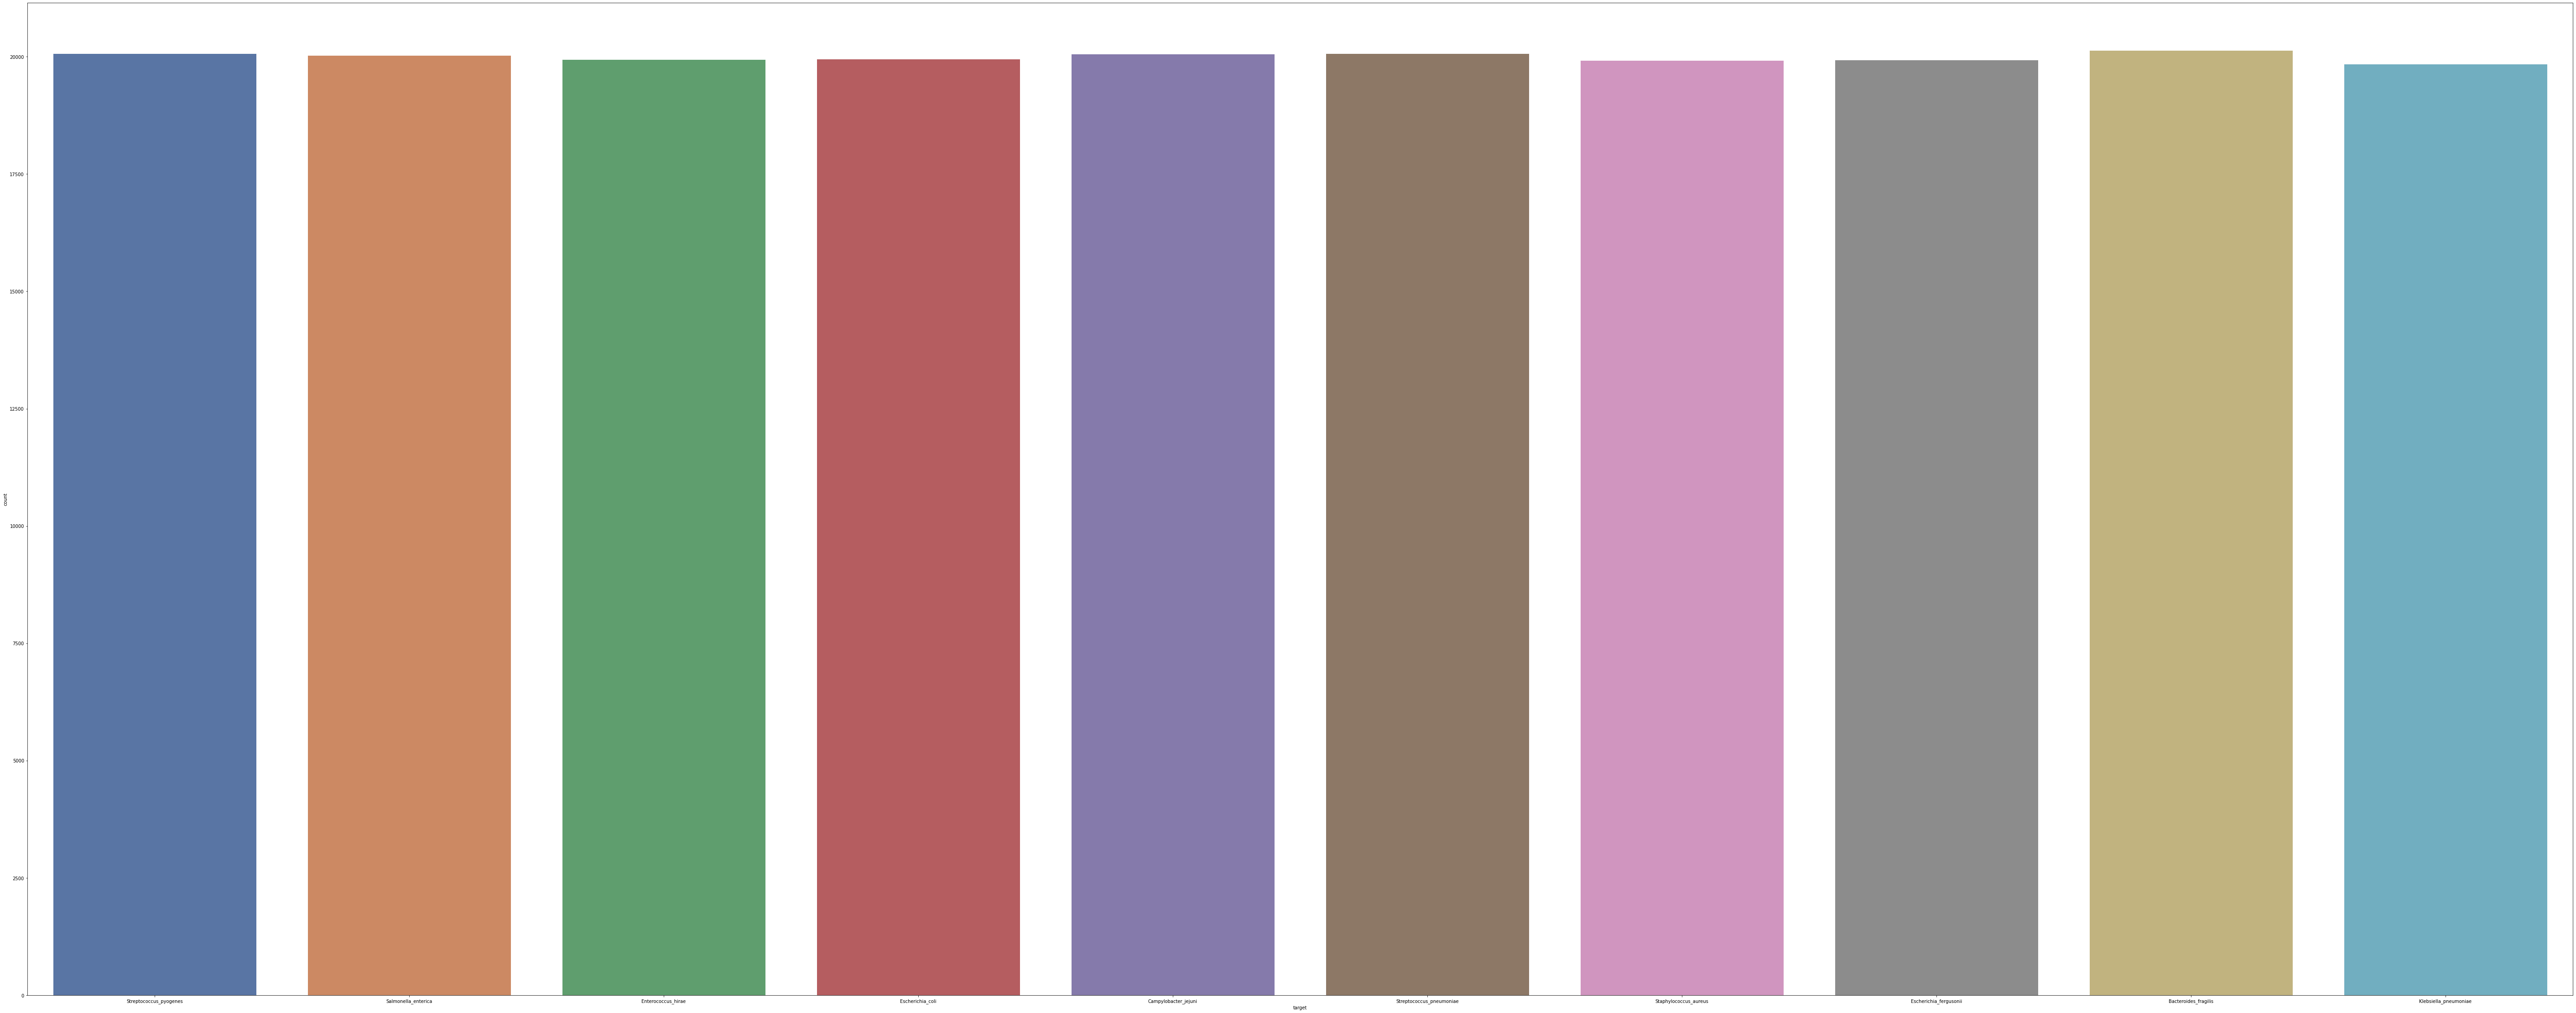

In [9]:
fig, ax = plt.subplots(figsize=(100,40))
sns.set(font_scale=5)
sns.countplot(x=data.target, ax= ax)

Text(0.5, 0, 'Possible histograms(ATGC)')

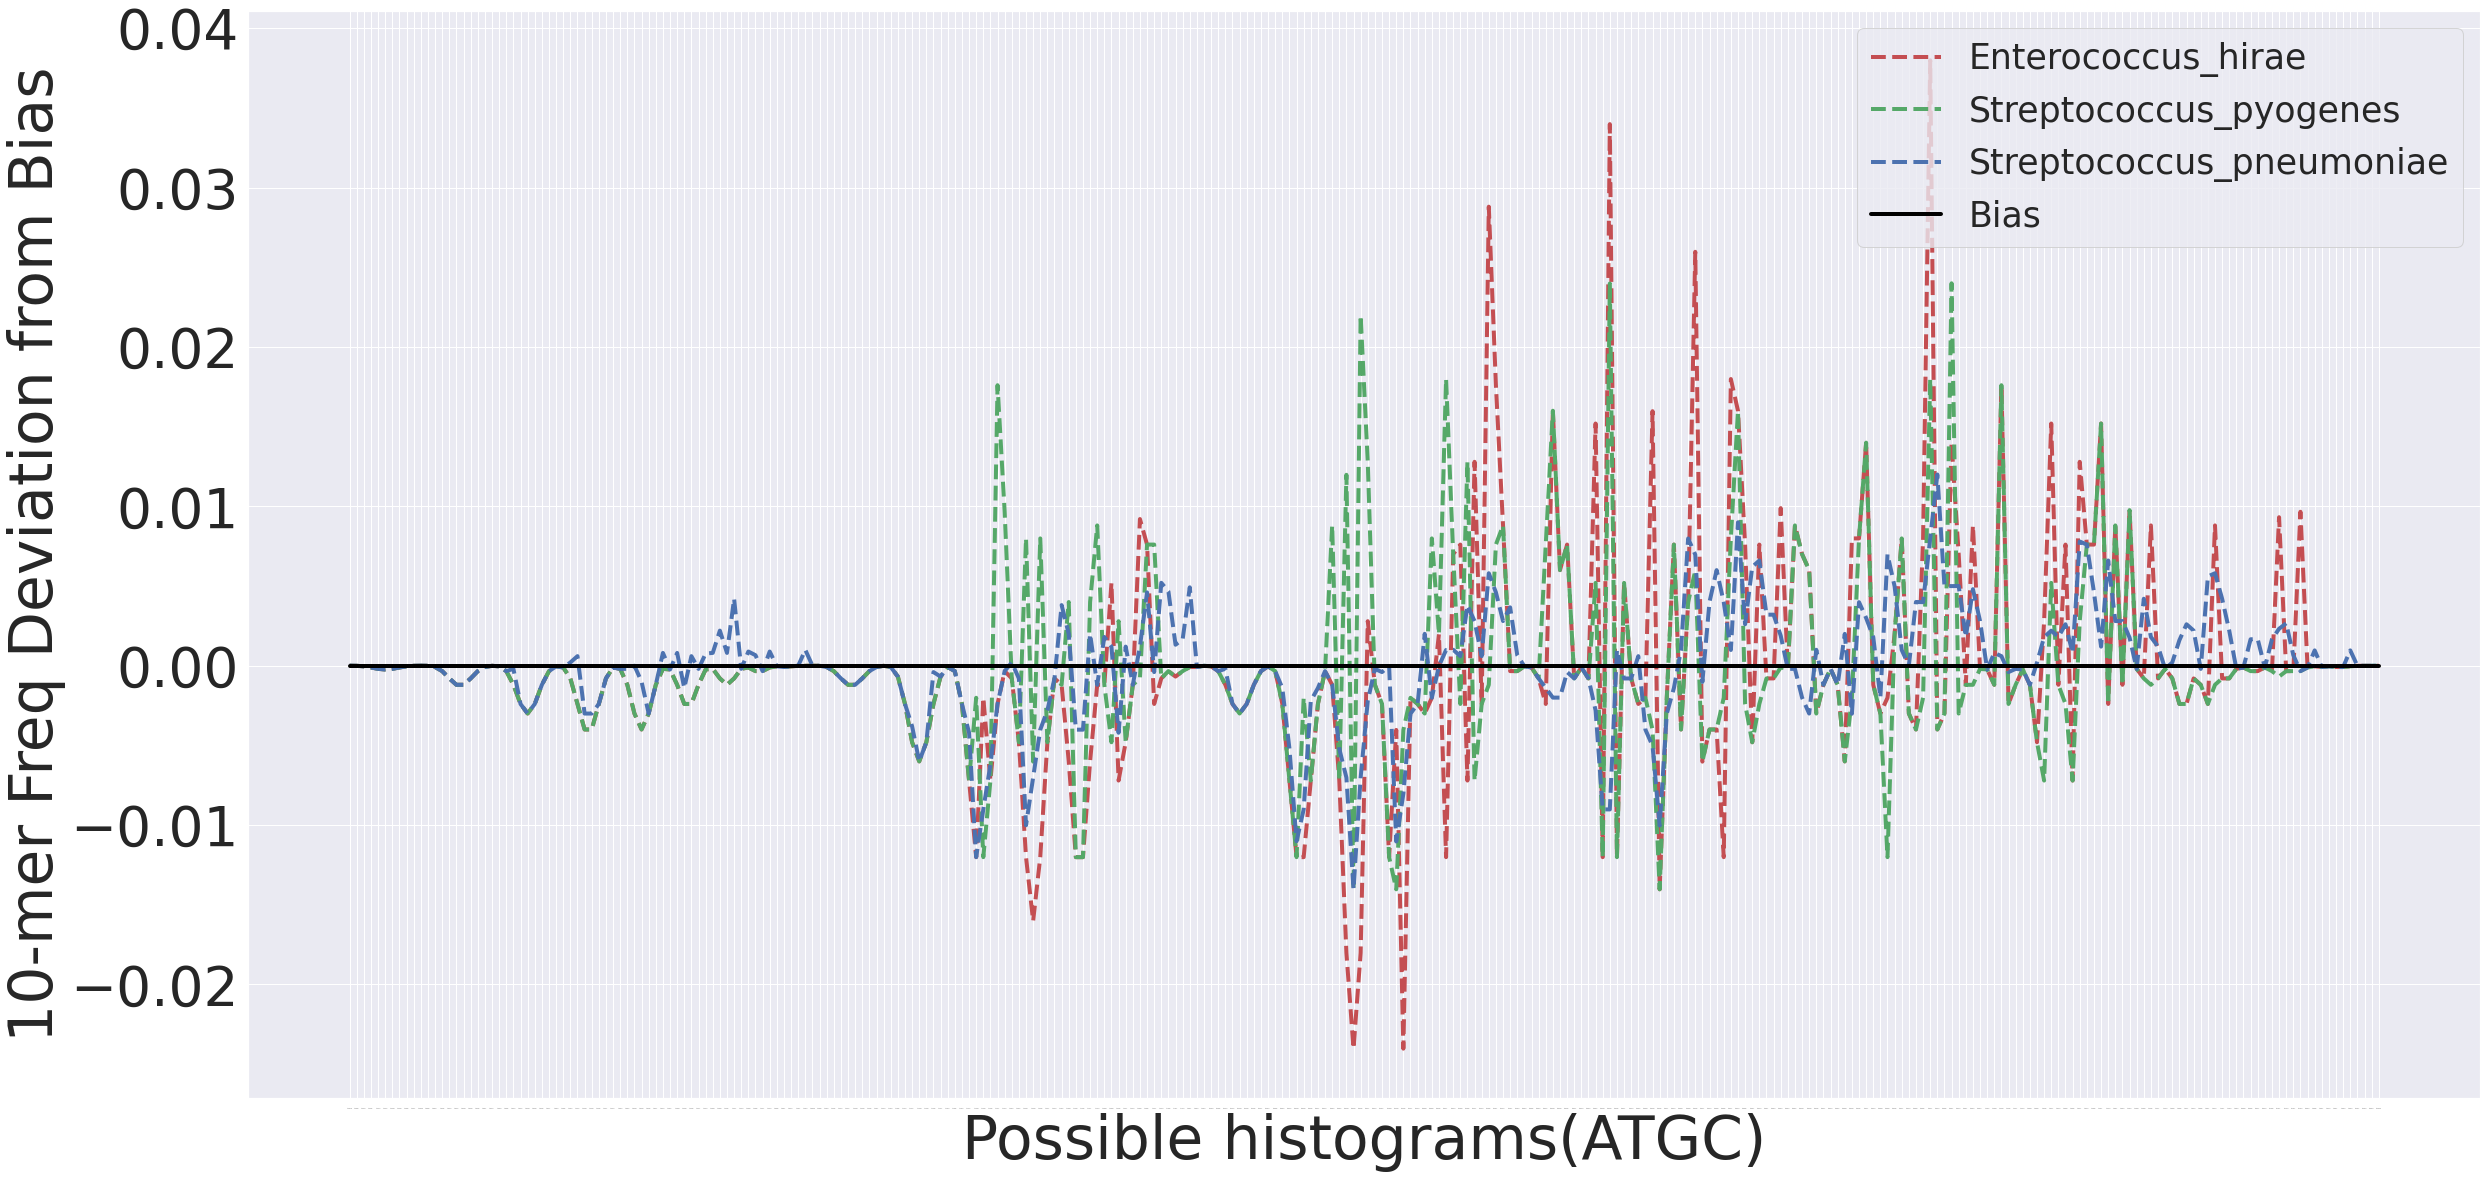

In [10]:
fig, ax = plt.subplots(figsize=(40,20))
plt.xticks(fontsize=1)
ax.plot(data.iloc[4,:286], 'r--',  linewidth=4, label='Enterococcus_hirae')
ax.plot(data.iloc[0,:286], 'g--',   linewidth=4, label = 'Streptococcus_pyogenes')
ax.plot(data.iloc[8,:286], 'b--',   linewidth=4, label = 'Streptococcus_pneumoniae')
ax.plot(np.zeros(shape=(286,)), 'black', linewidth=4, label = 'Bias')
ax.legend(loc=1, fontsize='xx-small')
ax.set_ylabel('10-mer Freq Deviation from Bias')
ax.set_xlabel('Possible histograms(ATGC)')

In [4]:
data_train = data.copy()

elements = [col for col in data.columns if col != 'target']

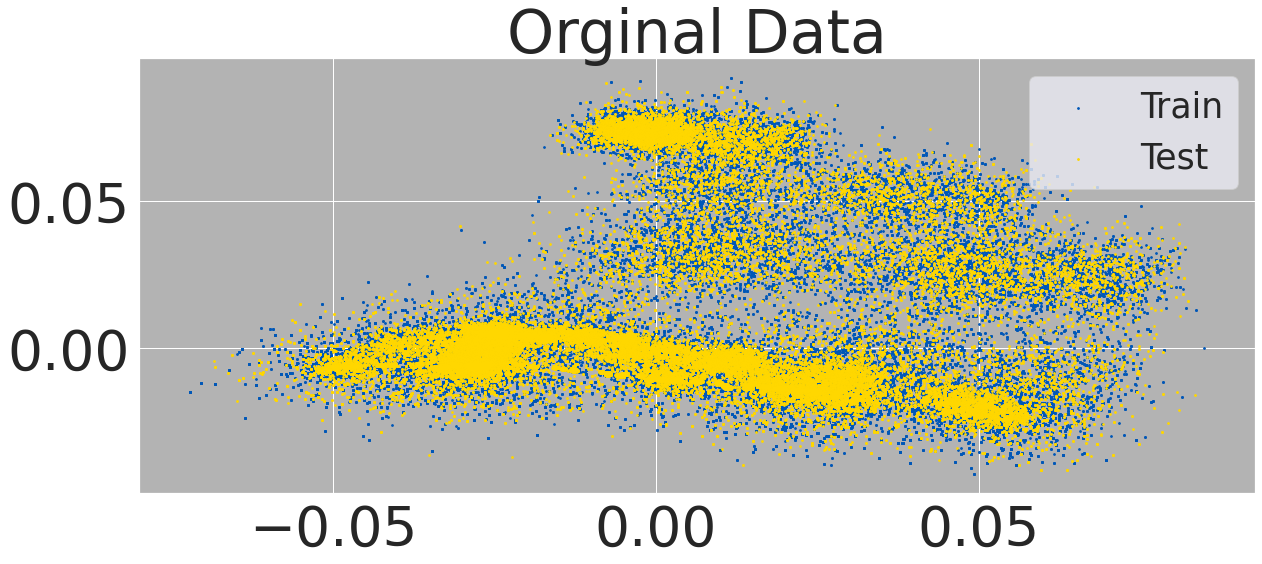

In [12]:
from sklearn.decomposition import PCA

def plot_pca(tr,te,title):
    pca = PCA(n_components=2)
    tr_p = pca.fit_transform(tr)
    te_p = pca.fit_transform(te)
    
    plt.figure(figsize=(20,8))
    plt.gca().set_facecolor((0.7,0.7,0.7))
    
    plt.scatter(tr_p[:,0], tr_p[:,1], s=3, c='#0057b8', label='Train') # train: blue
    plt.scatter(te_p[:,0], te_p[:,1], s=3, c='#ffd700', label='Test') # test: yellow
    plt.legend(loc=1, fontsize='xx-small')
    plt.title(title)
    plt.show()

plot_pca(data_train[elements], data_test[elements], 'Orginal Data')

### Identifying the duplicate values & Feature Transformation

Due to the random generation of samples, several hundred rows of data present are duplicated, to deal with these dupicate values we find the data points generated in train and test set that have similar p-value and come under the same seed hence being able to *pair* as close neighbors

Creating bias for dna sequence:

In [5]:
from math import factorial 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import RadiusNeighborsClassifier

In [6]:
le = LabelEncoder()
data_train['target_encoded'] = le.fit_transform(data_train.target)
data_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_encoded
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2


In [15]:
def bias_of(s):
    w = int(s[1:s.index('T')])
    x = int(s[s.index('T')+1:s.index('G')])
    y = int(s[s.index('G')+1:s.index('C')])
    z = int(s[s.index('C')+1:])
    return factorial(10) / (factorial(w) * factorial(x) * factorial(y) * factorial(z) * 4**10)

bias_vector = np.array([bias_of(col) for col in elements])

train_i = pd.DataFrame(((data_train[elements].values + bias_vector)*1000000).round().astype('int'), columns=elements, index=data_train.index)
test_i = pd.DataFrame(((data_test[elements].values + bias_vector)*1000000).round().astype('int'), columns=elements, index=data_test.index)

data_train['gcd'] = np.gcd.reduce(train_i[elements], axis =1)
data_test['gcd'] = np.gcd.reduce(test_i[elements], axis=1)

In [16]:
Z_tr = (train_i[(data_train.gcd==10000)].drop_duplicates(elements) // 10000)
y_tr = data_train[(data_train.gcd == 10000)].drop_duplicates(elements).target_encoded

Z_te = (test_i[(data_test.gcd == 10000)] // 10000)
Z_tr.shape, Z_te.shape, y_tr.shape

((15134, 286), (24911, 286), (15134,))

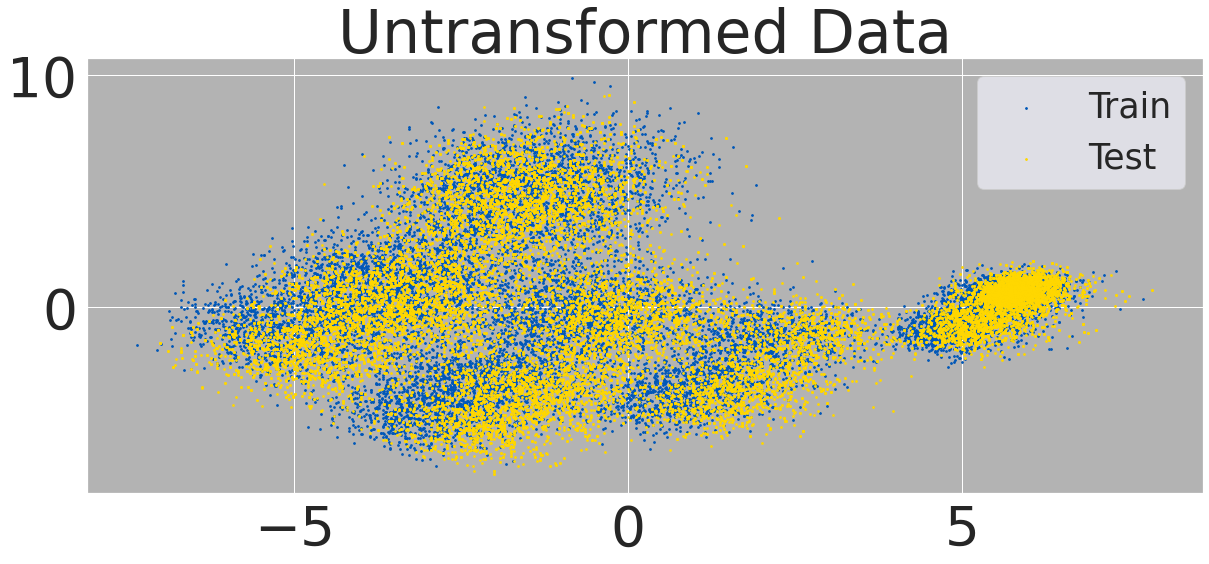

In [17]:
plot_pca(Z_tr, Z_te, 'Untransformed Data')

### Feature Transformation

In [ ]:
def transform(Z):
    ll = [] # list of lists which will be converted to a 2d array
    for i in range(len(Z)):
        l = [] # list which will be converted to a row of the new 2d array
        for j in range(Z.shape[1]):
            for k in range(Z.iloc[i, j]): l.append(j)
        ll.append(l)
    return np.array(ll)

X_tr = transform(Z_tr)
X_te = transform(Z_te)
X_tr.shape, X_te.shape

In [ ]:
plot_pca(X_tr, X_te, 'Transformed Data')

### To Reduce Memory Usage 

In [7]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum()/1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                     df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                     df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
            else:
                  df[col] = df[col].astype('category')
                        
        end_mem = df.memory_usage().sum() / 1024**2
        print('Start Memory', start_mem)
        print('End Memory', end_mem)
        
        return df          

In [8]:
data_train = reduce_mem_usage(data)
data_test = reduce_mem_usage(data_test)

Start Memory 437.9273681640625
End Memory 436.59289169311523
Start Memory 218.2008056640625
End Memory 217.5339469909668


### Creating Prediction Model

In [9]:
data_train['target_encoded'] = le.fit_transform(data_train.target)
data_train.head()

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,target_encoded
0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,9
1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,6
2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,...,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica,6
3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,...,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,6
4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,...,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = data_train[elements]
X = ss.fit_transform(X)
y = data_train.target_encoded
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180000, 286), (20000, 286), (180000,), (20000,))

#### Linear Modeling

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
clf = LogisticRegression(random_state=0, max_iter = 1000, penalty='l2', multi_class='multinomial', verbose = 1).fit(X_train, y_train)
x_pred= clf.predict(X_test)
accuracy_score(x_pred,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         2870     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14465D+05    |proj g|=  2.99410D+04


 This problem is unconstrained.



At iterate   50    f=  9.40314D+04    |proj g|=  6.19405D+02

At iterate  100    f=  8.66179D+04    |proj g|=  2.28443D+02

At iterate  150    f=  8.26581D+04    |proj g|=  1.89785D+02

At iterate  200    f=  8.07023D+04    |proj g|=  1.01902D+02

At iterate  250    f=  7.96668D+04    |proj g|=  1.48681D+02

At iterate  300    f=  7.91350D+04    |proj g|=  8.50562D+01

At iterate  350    f=  7.88674D+04    |proj g|=  4.18122D+01

At iterate  400    f=  7.87157D+04    |proj g|=  3.87779D+01

At iterate  450    f=  7.86481D+04    |proj g|=  2.40665D+01

At iterate  500    f=  7.86075D+04    |proj g|=  2.24953D+01

At iterate  550    f=  7.85758D+04    |proj g|=  7.66267D+01

At iterate  600    f=  7.85470D+04    |proj g|=  4.19506D+01

At iterate  650    f=  7.85262D+04    |proj g|=  1.82102D+01

At iterate  700    f=  7.85134D+04    |proj g|=  1.36401D+01

At iterate  750    f=  7.85046D+04    |proj g|=  1.75966D+01

At iterate  800    f=  7.84982D+04    |proj g|=  1.61866D+01

At iter

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.0min finished


0.87625

### Radius Neighbors Classifiers

In [143]:
from sklearn.neighbors import RadiusNeighborsClassifier
rnc = RadiusNeighborsClassifier(radius=18, weights='distance', p=1, outlier_label=-1, n_jobs=-1)
rnc.fit(X_train,y_train)
y_pred = rnc.predict(X_test)
print('Unique predictions:', np.unique(y_pred))
print('Frequencies:', np.unique(y_pred, return_counts=True)[1])
print('Samples:', len(y_pred))
print('Predicted samples:', len(y_pred) - np.unique(y_pred, return_counts=True)[1][0])

Unique predictions: [-1  0  1  2  3  4  5  6  7  8  9]
Frequencies: [ 641 1968 1911 1895 1896 1995 1884 1991 1954 1918 1947]
Samples: 20000
Predicted samples: 19359


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:669: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  "".format(self.outlier_label_[k])


In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test,y_pred)

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [  66, 1936,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [  52,    0, 1911,    0,    0,    0,    0,    0,    0,    0,    0],
        [  60,   26,    0, 1895,    0,    0,    0,    0,    0,    0,    0],
        [  79,    0,    0,    0, 1868,   48,    0,    0,    0,    0,    0],
        [  68,    0,    0,    0,    1, 1946,    0,    0,    0,    0,    0],
        [  72,    0,    0,    0,    0,    0, 1884,   53,    0,    0,    0],
        [  64,    0,    0,    0,   27,    1,    0, 1938,    0,    0,    0],
        [  44,    0,    0,    0,    0,    0,    0,    0, 1954,    0,    0],
        [  60,    6,    0,    0,    0,    0,    0,    0,    0, 1918,    0],
        [  76,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1947]]),
 0.95985)

### Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict 

modellet = ExtraTreesClassifier(n_estimators=500, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
                               min_impurity_decrease=0.0,bootstrap=False, n_jobs =-1, random_state=10, verbose=1)
modelStack = StackingClassifier(estimators=[('ET1', modellet),('ET2', modellet),('ET3', modellet)], final_estimator=modellet)
modelStack.fit(X_train, y_train)
y_preddt = modelStack.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished
[

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test, y_preddt), accuracy_score(y_test,y_preddt)

(array([[1999,    1,    0,    0,    2,    0,    0,    0,    0,    0],
        [   0, 1959,    0,    0,    0,    0,    0,    2,    0,    2],
        [   0,    0, 1974,    0,    0,    0,    0,    1,    0,    6],
        [   1,    0,    0, 1980,   11,    2,    0,    0,    1,    0],
        [   0,    0,    0,    1, 2012,    0,    2,    0,    0,    0],
        [   0,    0,    0,    0,    0, 2008,    1,    0,    0,    0],
        [   1,    0,    0,    2,    4,    2, 2020,    0,    0,    1],
        [   0,    1,    0,    0,    0,    0,    0, 1996,    0,    1],
        [   1,    0,    2,    0,    0,    0,    0,    1, 1973,    7],
        [   0,    1,    9,    0,    0,    0,    0,    0,   10, 2003]]),
 0.9962)

#### Best Result

## Neural Network

In [84]:
from keras.models import Sequential 
from keras.layers import Dense, Activation,Flatten 
import tensorflow as tf

NN_model = Sequential([
    Dense(128,activation = 'relu',kernel_initializer='normal',input_dim = X.shape[1]),
    Dense(256,activation = 'relu',kernel_initializer='normal', trainable = True, name = 'layer1'),
    Dense(512, activation = 'relu',kernel_initializer='normal', trainable = True, name = 'layer2'),
    Dense(256, activation = 'relu',kernel_initializer='normal', trainable = True, name = 'layer3'),
    tf.keras.layers.Dropout(0.2),
    Dense(10, kernel_initializer = 'normal',activation='softmax')
])

NN_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss = "sparse_categorical_crossentropy", metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               36736     
_________________________________________________________________
layer1 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer2 (Dense)               (None, 512)               131584    
_________________________________________________________________
layer3 (Dense)               (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_______________________________________________

In [85]:
NN_model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
4500/4500 [==============================] - 26s 6ms/step - loss: 0.3628 - mean_absolute_error: 4.4203 - val_loss: 0.2296 - val_mean_absolute_error: 4.4061
Epoch 2/10
4500/4500 [==============================] - 24s 5ms/step - loss: 0.1939 - mean_absolute_error: 4.4203 - val_loss: 0.1596 - val_mean_absolute_error: 4.4061
Epoch 3/10
4500/4500 [==============================] - 25s 5ms/step - loss: 0.1553 - mean_absolute_error: 4.4203 - val_loss: 0.1563 - val_mean_absolute_error: 4.4061
Epoch 4/10
4500/4500 [==============================] - 25s 6ms/step - loss: 0.1378 - mean_absolute_error: 4.4203 - val_loss: 0.1377 - val_mean_absolute_error: 4.4061
Epoch 5/10
4500/4500 [==============================] - 25s 6ms/step - loss: 0.1205 - mean_absolute_error: 4.4203 - val_loss: 0.1284 - val_mean_absolute_error: 4.4061
Epoch 6/10
4500/4500 [==============================] - 25s 6ms/step - loss: 0.1131 - mean_absolute_error: 4.4203 - val_loss: 0.1162 - val_mean_absolute_error: 4.406

In [86]:
NN_model.evaluate(X_test,y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.1031 - mean_absolute_error: 4.4330


[0.1030898168683052, 4.433017253875732]

In [132]:
pred1_test = NN_model.predict(X_test)
pred1_test

array([[4.3803233e-24, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.1627150e-35, 3.0136393e-32],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.9368361e-24, 1.7898884e-30, 6.4805258e-14, ..., 1.8807452e-15,
        6.0264543e-13, 1.0000000e+00],
       ...,
       [4.8670573e-12, 0.0000000e+00, 4.0353071e-28, ..., 3.1375639e-34,
        2.0867121e-21, 1.5441047e-17],
       [1.2256766e-19, 7.3598539e-23, 1.4099447e-10, ..., 5.8734349e-14,
        4.3136361e-10, 1.0000000e+00],
       [2.2770321e-36, 1.0000000e+00, 3.3461773e-27, ..., 6.7034234e-15,
        3.0428320e-31, 2.6437302e-30]], dtype=float32)

In [137]:
y_pred1_test = np.argmax(pred1_test, axis =1)
confusion_matrix(y_test, y_pred1_test), accuracy_score(y_test,y_pred1_test)

(array([[1935,    3,   11,    9,   19,    0,    9,    2,   13,    1],
        [   0, 1930,    9,    0,    0,    0,    0,   22,    2,    0],
        [   3,   16, 1905,    0,    0,    0,    3,   12,   18,   24],
        [  13,    0,    1, 1876,   36,    5,   63,    0,    1,    0],
        [  13,    0,    2,   19, 1943,    4,   30,    0,    3,    1],
        [   1,    1,    0,    0,    7, 1984,   15,    0,    1,    0],
        [   3,    0,    2,    5,   21,   28, 1971,    0,    0,    0],
        [   0,   39,    7,    0,    0,    0,    0, 1944,    3,    5],
        [  21,   16,    9,    0,    1,    0,    1,   11, 1913,   12],
        [   8,   10,   28,    0,    0,    0,    1,   14,   31, 1931]]),
 0.9666)

### Using keras utils to categorize classes into binary matrix rather than integers

In [87]:
from keras.utils import to_categorical 
output_category = to_categorical(data_train['target_encoded'],num_classes=None)
output_category 

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, output_category, test_size=0.2)
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((160000, 286), (40000, 286), (160000, 10), (40000, 10))

In [138]:
NN_model3 = Sequential([
        Dense(128,activation = 'relu',kernel_initializer='random_uniform', input_dim=X.shape[1]),
        Dense(256,activation = 'relu',kernel_initializer='random_uniform', trainable = True, name = 'layer1'),
        Dense(512, activation = 'relu',kernel_initializer='random_uniform', trainable = True, name = 'layer2'),
        Dense(256, activation = 'relu',kernel_initializer='random_uniform', trainable = True, name = 'layer4'),
        tf.keras.layers.Dropout(0.5),
        Dense(10, kernel_initializer = 'normal',activation='softmax')
])
NN_model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss = "categorical_crossentropy", metrics=['mean_absolute_error'])
NN_model3.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               36736     
_________________________________________________________________
layer1 (Dense)               (None, 256)               33024     
_________________________________________________________________
layer2 (Dense)               (None, 512)               131584    
_________________________________________________________________
layer4 (Dense)               (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                2570      
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_______________________________________________

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [139]:
NN_model3.fit(X1_train, y1_train,epochs = 10,verbose=1,validation_split=0.2)

Epoch 1/10
4000/4000 [==============================] - 24s 6ms/step - loss: 0.4369 - mean_absolute_error: 0.0437 - val_loss: 0.2425 - val_mean_absolute_error: 0.0245
Epoch 2/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.2343 - mean_absolute_error: 0.0231 - val_loss: 0.1925 - val_mean_absolute_error: 0.0185
Epoch 3/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.1871 - mean_absolute_error: 0.0180 - val_loss: 0.1646 - val_mean_absolute_error: 0.0155
Epoch 4/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.1607 - mean_absolute_error: 0.0153 - val_loss: 0.1395 - val_mean_absolute_error: 0.0132
Epoch 5/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.1508 - mean_absolute_error: 0.0141 - val_loss: 0.1935 - val_mean_absolute_error: 0.0187
Epoch 6/10
4000/4000 [==============================] - 23s 6ms/step - loss: 0.1373 - mean_absolute_error: 0.0130 - val_loss: 0.1446 - val_mean_absolute_error: 0.012

In [140]:
NN_model3.evaluate(X1_train,y1_train)

5000/5000 [==============================] - 13s 3ms/step - loss: 0.1114 - mean_absolute_error: 0.0104


[0.111419178545475, 0.010395039804279804]

In [141]:
pred_test = NN_model3.predict(X1_test)
pred_test

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.9975151e-01, 1.6857458e-16, 5.2031388e-09, ..., 2.2176659e-14,
        2.4808472e-04, 4.0751627e-07],
       [4.2973289e-28, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.2934025e-34],
       ...,
       [5.9927470e-07, 1.4824776e-14, 1.5348154e-09, ..., 3.7728466e-13,
        5.0037213e-10, 1.3548394e-07],
       [1.3566225e-07, 1.9960296e-18, 1.1507832e-12, ..., 1.6046566e-18,
        6.1155222e-12, 6.1055251e-11],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

Converting test labels in single-digits instead of one-hot encoding

In [142]:
y_test_arg = np.argmax(y1_test, axis =1)
y_pred_test = np.argmax(pred_test, axis =1)
confusion_matrix(y_test_arg, y_pred_test), accuracy_score(y_test_arg,y_pred_test)

(array([[3957,    3,   13,    5,   13,    0,    5,    3,   39,   48],
        [   0, 3957,   24,    0,    0,    0,    0,   89,    4,    6],
        [   6,   16, 3779,    1,    2,    0,    0,   16,   23,   56],
        [  30,    0,    1, 3624,  253,   17,   72,    0,    5,   10],
        [  33,    0,    0,   46, 3821,   16,   21,    1,    6,   25],
        [   9,    0,    0,   21,   23, 3900,   29,    0,    2,    0],
        [  23,    0,    1,   31,  106,   48, 3793,    0,    3,    4],
        [   1,   31,   47,    0,    0,    0,    0, 3866,    2,   62],
        [  21,    1,   76,    0,    5,    0,    0,   12, 3672,  119],
        [  15,    0,   82,    1,    3,    0,    0,   29,   51, 3865]]),
 0.95585)